# one to many
## 中田竜明

In [1]:
include("da.jl")

DA

ソースコードはこちら [ソースコード](https://github.com/nswa17/DA_alg.jl/blob/master/da.jl)

実行例:

In [2]:
DA.call_match([1 2; 2 1; 0 0], [1 2; 2 1; 0 0], [1, 1])

([1,2],[1,2],[1,2,3])

引数２つだと1 to 1バージョンが呼ばれます.

In [3]:
DA.call_match([1 2; 2 1; 0 0], [1 2; 2 1; 0 0])

([1,2],[1,2])

stableかどうかチェックする関数も中身を変更しました.

In [4]:
DA.stable_matching([1, 2], [1, 2], [1, 2, 3], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

false

In [5]:
DA.stable_matching([1, 2], [1, 2], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

false

In [6]:
DA.stable_matching([2, 1], [1, 2], [1, 2, 3], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

true

In [7]:
DA.stable_matching([2, 1], [1, 2], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

true

テストを行います

In [8]:
deferred_acceptance = DA.call_match
include("test_deferred_acceptance.jl")
print()

Test Summary: | Pass  Total
Testing da.jl |   10     10


通ったようです.

またスピードを計測してみます. まずは応募が実質1 to 1となるケースにおいて, 様々な人数に対して1tomanyと1to1のスピードを計測します.

In [9]:
one2one_times = Float64[]
one2many_times = Float64[]
for i in 1:20
    m = i * 100
    n = i * 100
    m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
    caps = ones(Int, n)
    _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs, caps)
    push!(one2one_times, elapsedtime)
    _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs)
    push!(one2many_times, elapsedtime)
end

In [10]:
using PyPlot

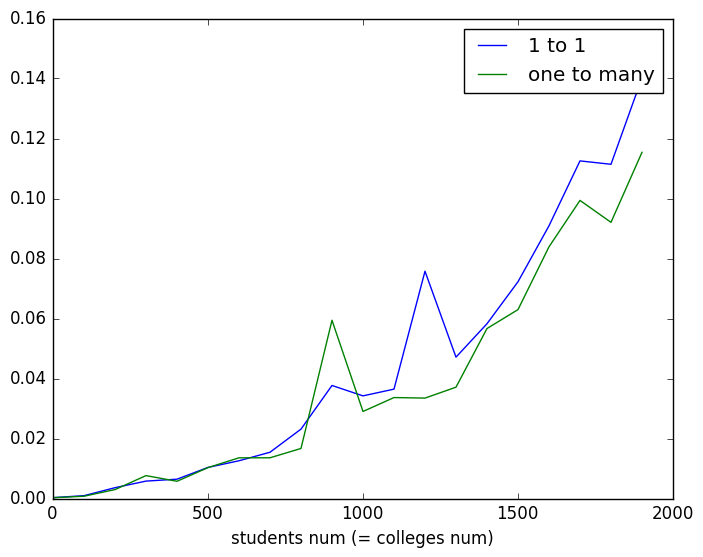

PyObject <matplotlib.legend.Legend object at 0x31c72c908>

In [11]:
plot(collect(1:100:2000), one2one_times, label="1 to 1")
plot(collect(1:100:2000), one2many_times, label="one to many")
PyPlot.xlabel("students num (= colleges num)")
legend()

マッチングの人数が2000以下の時にはほぼ等しいようです. つぎは人数を固定してそれぞれのアルゴリズムを計測します. まずは300人のとき,

In [12]:
using Matching

In [13]:
function speedtest_plot(m, n)
    one2one_times = Float64[]
    one2many_times = Float64[]
    for i in 1:20
        m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
        caps = ones(Int, n)
        _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs, caps)
        push!(one2one_times, elapsedtime)
        _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs)
        push!(one2many_times, elapsedtime)
    end
    plot(one2one_times, label="1 to 1")
    plot(one2many_times, label="one to many")
    PyPlot.xlabel("test No.")
    legend()
end

speedtest_plot (generic function with 1 method)

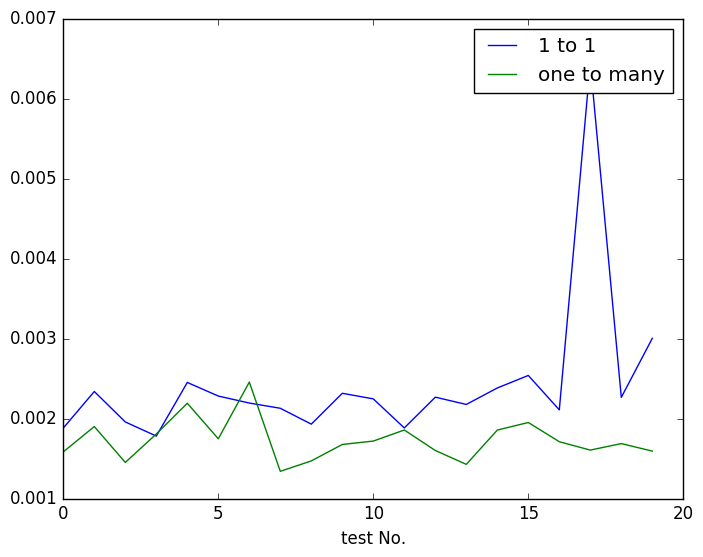

PyObject <matplotlib.legend.Legend object at 0x30fe3ef28>

In [14]:
speedtest_plot(300, 300)

one2manyのアルゴリズムのほうが少しだけ早いみたいです..? 次は4000人の時,

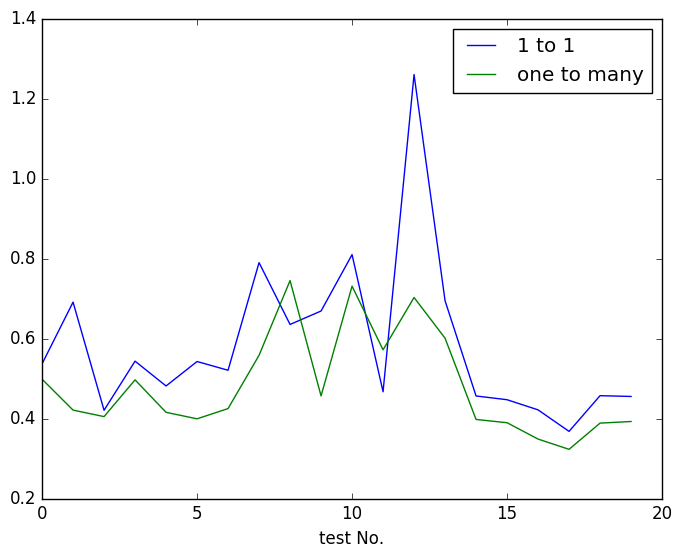

PyObject <matplotlib.legend.Legend object at 0x317161978>

In [15]:
speedtest_plot(4000, 4000)

one2manyのほうが少し早いようです.

次はone2manyの受け入れ側の数を固定して計測します.

In [16]:
function speedtest_plot2(ms, n)
    timess = Float64[]
    for m in ms
        times = Float64[]
        s_prefs, c_prefs, caps = random_prefs(m, n, ReturnCaps)
        for i in 1:10
            _, elapsedtime, _, _, _ = @timed DA.call_match(s_prefs, c_prefs, caps)
            push!(times, elapsedtime)
        end
        push!(timess, mean(times))
    end
    plot(ms, timess)
    PyPlot.xlabel("students")
    legend()
end

speedtest_plot2 (generic function with 1 method)

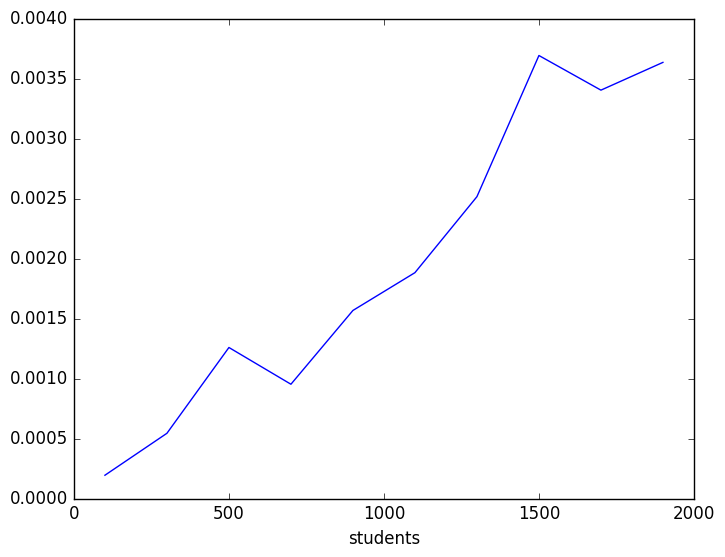

In [18]:
speedtest_plot2(100:200:2000, 100)